In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Activity 2: Numerical Methods

Note: just like activity 1, you need to make a *copy* of this notebook to edit and submit for credit.

## Preliminaries

This unit is all about computing the solutions of differential equations *numerically*.  Why do we want to do this? A number of reasons:

1. For many real-world systems, it's not possible to solve the differential equations that describe the system analytically. We may need to make many approximations and idealizations in order to get equations that are solvable using calculus. A numerical solution may be the only way to understand when these approximations and idealizations are reasonable, and to get concrete results when they are not.
2. Once we get an analytical solution to the problem, we need some way to validate that our solution is reasonable. A numerical solution is an independent means of testing for validity (note: this works both ways! One good way to validate a numerical solution is to use an analytical solution under simplified circumstances.)
3. Many real world systems these days are built on computers (either large computer systems, or tiny embedded systems) and generating solutions that can be used for feedback or control require real-time calculation of solutions based on sensor data. These real-time solutions require approaches very similar to the ones we'll study in this unit.

In order to implement these ideas we'll need to introduce a few, possibly new, programming concepts:

1. **Loops**: A loop is a way to repeat the same code many times. This is important when solving differential equations numerically because the process is inherantly iterative. We break the problem down into tiny steps and we use the differential equation to tell us how each step should progress. 
2. **Functions**: It's useful to separate out bits of the solution process into independent pieces. One nice way to do that is to make each part a *function* that just knows how to handle that one part.
3. **Lists**: We can use lists to save the results of the calculation as the process continues.
4. **Arrays**: An array is a kind of high-performance list of all the same kinds of values.

Let's go through these one-by-one in detail.

## Loops

In general a loop is a structure that lets you repeat code many times. There are two basic types: `for` loops and `while` loops.

### For Loops

Here's a simple `for` loop in python:

In [3]:
for k in [0,1,2,3,4]:
    print("k=",k,"k**2=",k**2)

k= 0 k**2= 0
k= 1 k**2= 1
k= 2 k**2= 4
k= 3 k**2= 9
k= 4 k**2= 16


Note that `k**2` is how you spell exponentiation (i.e., $k^2$) in python.

A `for` loop always starts like `for foo in bar:`, where `foo` is the "loop control variable" and `bar` is something that can be iterated over, often a list or an array. There is a handy utility called `range` that can be used to generate an iterator on the fly.

In [4]:
for k in range(5):
    print("k=",k,"k**2=",k**2)

k= 0 k**2= 0
k= 1 k**2= 1
k= 2 k**2= 4
k= 3 k**2= 9
k= 4 k**2= 16


Note that, by default, range starts with zero. We'll see how this is useful when we get to list indexing.

### While Loops

A while loop requires a condition that can, in principle, be either true or false. Here is an example of a while loop:

In [5]:
k = 0
while k < 5:
    print("k=",k,"k**2=",k**2)
    k = k + 1

k= 0 k**2= 0
k= 1 k**2= 1
k= 2 k**2= 4
k= 3 k**2= 9
k= 4 k**2= 16


Note that this loop does exactly the same thing as the for loop, but takes more typing. You have to "set up" the variables in the condition beforehand. You also need to manually adjust the variables used in the condition each time through the loop. Sometimes, this is a natural side effect of the calculation, so it's no *extra* work. The good thing about a `while` loop is that it's very general. There's nothing a `for` loop can do that a `while` loop can't. However, it takes more bookkeeping and typing. This is the price we pay for generality. In the context of differential equations, we'll more often be using the `while` loop, but not always.

## Functions

A *function* is a packaged bit of code that performs a specific task. Sometimes it returns a value, like a mathematical function (e.g., `np.sin(x)`), but sometimes it just does something but doesn't return anything (e.g., `print("hello")`). You can define your own functions using the `def` keyword in python:

In [6]:
def add3(x):
    return x+3

This example, `add3`, is a simple function that accepts one argument `x`, and returns the value of `x` plus 3. Let's test it!

In [7]:
y = add3(5)
print("y =",y)

y = 8


Simple, right! One thing that sometimes confuses programmers who are first learning about functions is the nature of the arguments. The variables used as arguments in a function are just *placeholders*. They do not refer to variables of the same name in other parts of the program. Let's see how that works.

In [8]:
x = 9

def add3(x):
    return x+3

y = add3(5)

print("x =", x, ", y =",y)

x = 9 , y = 8


Notice that even though `x` was equal to 5 in the function, the value of `x` outside the function was always 9. The arguments to a function, and the variables *assigned* in a function are called *local* variables. They don't refer to variables outside the function. If you don't *assign* a variable in a function, and it's not an argument, python will look outside the function to resolve the value of the varible. That's what's confusing!

In [9]:
x = 9
y = 4

def add_y(x):
    return x + y

z = add_y(5)

print("x =", x, ", y =", y, ", z =",z)

x = 9 , y = 4 , z = 9


What's the main point? You can define a function that accepts values, calculates things, and returns values. It's important to keep track of which variables are *local* and which are not. When possible all the information a function needs to do it's job should be passed in as arguments to the function.

## Lists

A list is just a collection of things. You can create a list very easily with brackets in python: `myList = []`. This creates an empty list called `myList`. You can also create a list with things in it:

In [10]:
myList = [1,2,"hello",3.4,[5,6,7]]

for thing in myList:
    print("This thing is:",thing)



This thing is: 1
This thing is: 2
This thing is: hello
This thing is: 3.4
This thing is: [5, 6, 7]


Note how easy it is to use a `for` loop to iterate through the contents of a list! Lists and `for` loops work great together.

Probably the most important feature of a python list is the ability to add things to it dynamically during program execution:

In [11]:
myList = []

for k in range(5):
    myList.append(k**2)

print("my list is now:", myList)

my list is now: [0, 1, 4, 9, 16]


See how we started with the empty list, but then `append`ed each squared value of the loop variable `k` as the loop executed. At the end we had a list of the squared `k` values. You can see how a loop with lists can help us to keep a scratchpad with the accumulated results of a calculation, like the solution of a differential equation!


## Arrays

An array is much like a list with three important differences:

1. Homogeneity: An array has to have values of all the same *type* (e.g., integer, float, object, etc.)
2. Fixed size: While it's technically possible to adjust an array's size, it's tricky. We don't generally do that.
2. Mathability: When you do math with arrays it *just* *works*

There are some cases where it doesn't matter much if you use a list or an array (e.g., `plt.plot()`). However here are two basic guidelines:

1. If you need to `append` things to it, use a list.
2. If you need to do math with it, use an array.

To create an array use the `np.array(...)` method, then just *use* them as an array quantity. Let's see how that works:


In [12]:
x = np.array([1,2,3])
y = np.array([4,5,6])

print("x+y =", x + y)
print("x-y =", x-y)
print("x*y =", x*y)
print("x*np.exp(y) =", x*np.exp(y))
print("x/y =", x/y)

x+y = [5 7 9]
x-y = [-3 -3 -3]
x*y = [ 4 10 18]
x*np.exp(y) = [  54.59815003  296.82631821 1210.28638048]
x/y = [0.25 0.4  0.5 ]


You can see that the array operations just apply the math on each element of each array producing a new array with the results. We'll see how this comes in handy soon!

# The Euler method <a name="ref1"></a> [[1]](#note1)

Imagine you have a system described by a "state" **s**. The idea is that **s** is the list (or array) of all the variables that are needed to specify the system's condition at some moment in time. The state **s** could be a single number, or it could be several values (e.g., position and momentum). The point is that if you know **s** at some time, then you know all you need to know to understand what the system is doing at that time. The idea is that there is some rule that determines the rate of change of **s** that depends on **s**, and possibly also on the time like so:

$$\frac{ds}{dt} = f_s(s,t)$$
    
So.. if we have a rule like this, and we know the state of the system now, Euler's method allows us to estimate the state at a later time. How? Simple.. $f_s(s,t)$ is telling us the rate of change of **s** itself. So, if a short period of time $\Delta t$ passes what should be the corresponding change in s (called $\Delta s$)?

$$\frac{\Delta s}{\Delta t} \approx \frac{ds}{dt} = f_s(s,t)$$

Solving for $\Delta{s}$ gives:

$$\Delta s \approx f_s(s,t) \Delta t$$

That's the *Euler Method*! The only thing left is to add $\Delta s$ to the old value of **s**, and repeat the process many times until you get the value of s at some later time.

$$s_{\rm new} = s_{\rm old} + \Delta s$$

# Example
    
Let's work out a detailed example 'by hand'. Conside the first example from the last activity:

$$ \frac{dy}{dx} = y' = - y/5 $$

In this case our "state" is just a number, $y$. We can change variable names to match the "state" concept, so instead of $y$ let's use $s$ and instead of $x$ let's use $t$. So we can rewrite this using the state concept as:

$$\frac{ds}{dt} = f_s(s,t) = -s/5$$

So we can create a python function $f_s(s,t)$

In [13]:
def f_s(s, t):
    return -s/5

Let's make another function to implement the Euler Method:

In [14]:
def EulerStep(s, f, t, dt):
    return s + f(s,t)*dt

Note that this function accepts the current state, the $f(s,t)$ function, the current time, and the time step size. It then calls the $f$ function, which returns the, rate of change of $s$. Then according to teh Euler method, this gets multiplied by $dt$ which produces $\Delta s$. This is then added to $s$ and the new value of $s$ is returned.

How can we use this to compute a solution? Easy! We just write a loop and repeatedly call `EulerStep` saving the time and the step on each iteration so we can visualize the solution.

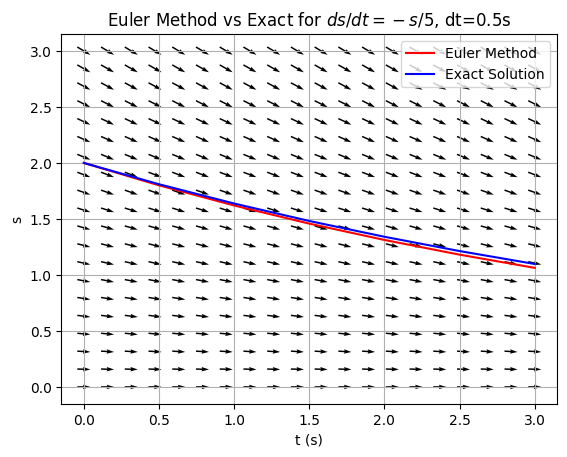

In [15]:
#
# Let's calculate the slope field first and store them in u,v
#

tdomain = np.linspace(0,3,20)
sdomain = np.linspace(0,3,20)

mesh_t,mesh_s = np.meshgrid(tdomain, sdomain)

u = 1
v = -mesh_s/5

#
# Next let's use the Euler method to solve the differential equation
#

s = 2
t = 0
dt = 0.5

s_list = [s]
t_list = [t]

while t < 3:
    s = EulerStep(s, f_s, t, dt) # take one step!
    t = t + dt # update t
    s_list.append(s) # use `append` to save s
    t_list.append(t) # use `append` to save t

#
# Now calculate the exact solution using numpy
#

s_exact = s_list[0]*np.exp(-np.array(t_list)/5)

#
# Now plot it all!
#

plt.quiver(mesh_t,mesh_s,u,v,pivot='mid')
plt.plot(t_list,s_list,'r-', label="Euler Method")
plt.plot(t_list,s_exact,'b-', label="Exact Solution")
plt.grid()
plt.xlabel("t (s)")
plt.ylabel("s")
plt.title(f"Euler Method vs Exact for $ds/dt = -s/5$, dt={dt:0.1f}s")
plt.legend(loc="upper right")

Notice that the Euler solution doesn't match the exact solution *exactly*. Remember that the Euler Method (and all these numerical methods we'll be studying) are only *approximate* solutions. Also, note that the accuracy of the solution depends on the size of the timestep. Let's repeat the calculation with a smaller timestep.

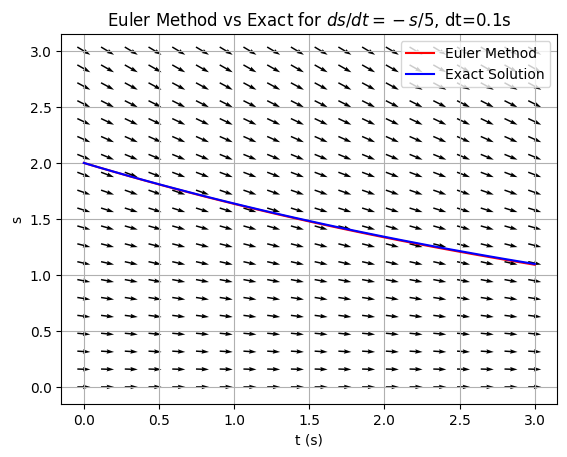

In [16]:
#
# Let's calculate the slope field first and store them in u,v
#

tdomain = np.linspace(0,3,20)
sdomain = np.linspace(0,3,20)

mesh_t,mesh_s = np.meshgrid(tdomain, sdomain)

u = 1
v = -mesh_s/5

#
# Next let's use the Euler method to solve the differential equation
#

s = 2
t = 0
dt = 0.1

s_list = [s]
t_list = [t]

while t < 3:
    s = EulerStep(s, f_s, t, dt) # take one step!
    t = t + dt # update t
    s_list.append(s) # use `append` to save s
    t_list.append(t) # use `append` to save t

#
# Now calculate the exact solution using numpy
#

s_exact = s_list[0]*np.exp(-np.array(t_list)/5)

#
# Now plot it all!
#

plt.quiver(mesh_t,mesh_s,u,v,pivot='mid')
plt.plot(t_list,s_list,'r-', label="Euler Method")
plt.plot(t_list,s_exact,'b-', label="Exact Solution")
plt.grid()
plt.xlabel("t (s)")
plt.ylabel("s")
plt.title(f"Euler Method vs Exact for $ds/dt = -s/5$, dt={dt:0.1f}s")
plt.legend(loc="upper right")

Note that the exact solution overlaps the Euler Method result *very* closely this time, but the only thing we changed was the size of the timestep.

# Heun Method (improved Euler)

There is a simple way to improve the Euler Method. That is to take a full step and re-evaluate the $f$ function. The use the *average* of the result from the initial evaluation and the result of the updated evaluation to produce an improved update.

In [17]:
def HeunStep(s, f, t, dt):
    f1 = f(s,t)            # evauate f at the start of the interval
    f2 = f(s+f1*dt, t+dt)  # evaluate f at the end of the interval
    return s + (f1+f2)*dt/2  # take the average of the two slopes and use that to take a step

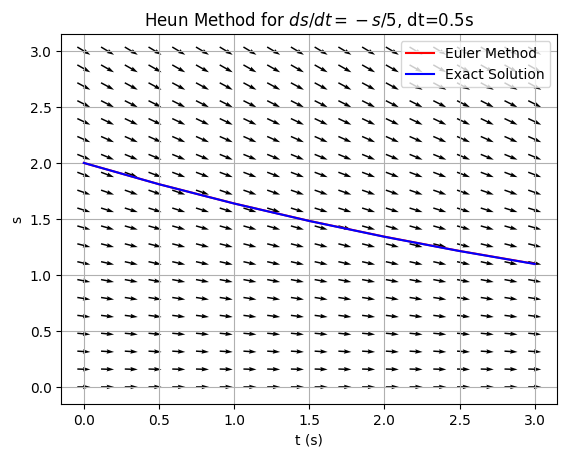

In [18]:
#
# Let's go back to the dt=0.5 timestep, but use the Heun Method
#

tdomain = np.linspace(0,3,20)
sdomain = np.linspace(0,3,20)

mesh_t,mesh_s = np.meshgrid(tdomain, sdomain)

u = 1
v = -mesh_s/5

#
# Next let's use the Euler method to solve the differential equation
#

s = 2
t = 0
dt = 0.5

s_list = [s]
t_list = [t]

while t < 3:
    s = HeunStep(s, f_s, t, dt) # take one step!
    t = t + dt # update t
    s_list.append(s) # use `append` to save s
    t_list.append(t) # use `append` to save t

#
# Now calculate the exact solution using numpy
#

s_exact = s_list[0]*np.exp(-np.array(t_list)/5)

#
# Now plot it all!
#

plt.quiver(mesh_t,mesh_s,u,v,pivot='mid')
plt.plot(t_list,s_list,'r-', label="Euler Method")
plt.plot(t_list,s_exact,'b-', label="Exact Solution")
plt.grid()
plt.xlabel("t (s)")
plt.ylabel("s")
plt.title(f"Heun Method for $ds/dt = -s/5$, dt={dt:0.1f}s")
plt.legend(loc="upper right")

# Mass on a spring

Here's a problem where you need more than just a single number to apply the Euler Method. Consider a mass on a spring:

![mass spring](Images/mass-spring.jpg)

Suppose the floor surface is frictionless (just to keep it simple for now!) and the mass is $m$ and the spring stiffness is $k$. From physics you know that:

$$ \frac{dp_x}{dt} = m \frac{dv_x}{dt} = -k x $$

where $x$ is the displacement of the mass from its equilibrium (relaxed) condition. We can move the $m$ to the right side and we get:

$$ \frac{dv_x}{dt} = - \frac{k}{m} x $$

But we also know that $x$ is related to $v_x$ by:

$$ \frac{dx}{dt} = v_x $$

So in order to predict what's going to happen in the future, we'll need to keep track of both $x$ *and* $v_x$. How can we do this using the Euler Method? Easy! Just make the "state" an *array* that includes *both* $x$ and $v_x$.

$$ {\boldsymbol s} = \begin{bmatrix} x \\ v_x \end{bmatrix} $$

Then:

$$ {\boldsymbol {\frac{ds}{dt}}} = \begin{bmatrix} v_x \\ - \frac{k}{m} \end{bmatrix} $$

So we can compute the rate of change of **s** using the current value of **s**. 

How can we handle this in python? Easy! Remember when I said how we'll see how arrays can be handy soon? Now it's time! We'll just use a numpy *array* to keep track of **s**. Then have the $f(s,t)$ function expect an array and treat it as such.

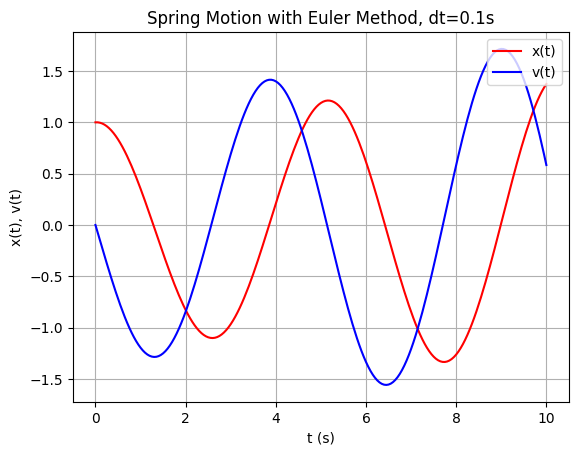

In [30]:
k = 3
m = 2

def f_spring(s,t):
    x = s[0] # get the x value out of the state array
    v = s[1] # get the v value out of the state array
    dxdt = v
    dvdt = -k*x/m
    return np.array([dxdt, dvdt])

s = np.array([1,0]) # initial state, displacement of 1 unit, no velocity
t = 0
dt = 0.05

tlist = [t]
xlist = [s[0]]
vlist = [s[1]]

while t<10:
    s = EulerStep(s, f_spring, t, dt)
    t = t + dt
    tlist.append(t)
    xlist.append(s[0])
    vlist.append(s[1])

plt.plot(tlist, xlist, 'r-', label="x(t)")
plt.plot(tlist, vlist, 'b-', label="v(t)")
plt.grid()
plt.xlabel("t (s)")
plt.ylabel("x(t), v(t)")
plt.title(f"Spring Motion with Euler Method, dt={dt:0.1f}s")
plt.legend(loc="upper right")


Also we can plot velocity in the vertical and position horizontally:

Text(0.5, 1.0, 'Phase Plot for Spring Motion with Euler Method, dt=0.1s')

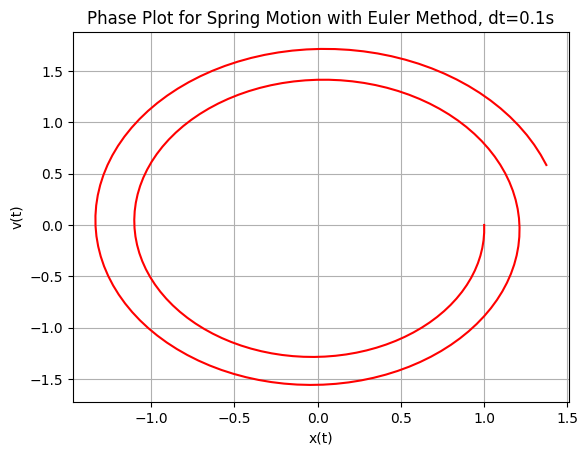

In [31]:
plt.plot(xlist, vlist, 'r-')
plt.grid()
plt.xlabel("x(t)")
plt.ylabel("v(t)")
plt.title(f"Phase Plot for Spring Motion with Euler Method, dt={dt:0.1f}s")

This plot is sometimes called a "phase plot". We'll be diggind deeper into the features of phase plots as we encounter new systems, but for now you can see that they give some insight into the trajectory of the state in time.

## Points of interest

I want to bring a couple issues to your attention.
1. This solution has very different behavior from the first order systems we've encountered so far! Most of the first order systems we've seen so far have had solutions made up of real exponentials of various kinds. This sytems is clearly periodic, suggesting sinusoidal solutions of some kind. Even though each equation in the system is a first order equation (i.e., $\dot{x}=v_x, \dot{v}_x=-k x/m$) because they are coupled the system overall is actually second order.
2. Physically we expect energy to be conserved, but you can see that the amplitude of the oscillation is visibly growing here! This is due to the approximate nature of the numerical method. We could "fix" this by reducing the timestep, but the problem would eventually take over if we looked at sufficiently long timescales. 

Let's try to deal with problem "2" here, the inaccuracy, by using the Heun method. This is where formulating the state as a numpy array is brilliant. Because of this we can just plug-in the Heun method without changing anything else about our code! See below.

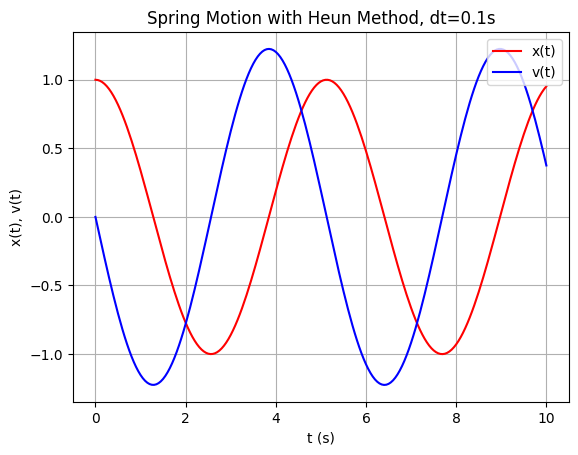

In [33]:
s = np.array([1,0]) # initial state, displacement of 1 unit, no velocity
t = 0
dt = 0.05

tlist = [t]
xlist = [s[0]]
vlist = [s[1]]

while t<10:
    s = HeunStep(s, f_spring, t, dt)
    t = t + dt
    tlist.append(t)
    xlist.append(s[0])
    vlist.append(s[1])

plt.plot(tlist, xlist, 'r-', label="x(t)")
plt.plot(tlist, vlist, 'b-', label="v(t)")
plt.grid()
plt.xlabel("t (s)")
plt.ylabel("x(t), v(t)")
plt.title(f"Spring Motion with Heun Method, dt={dt:0.1f}s")
plt.legend(loc="upper right")


Text(0.5, 1.0, 'Phase Plot for Spring Motion with Heun Method, dt=0.1s')

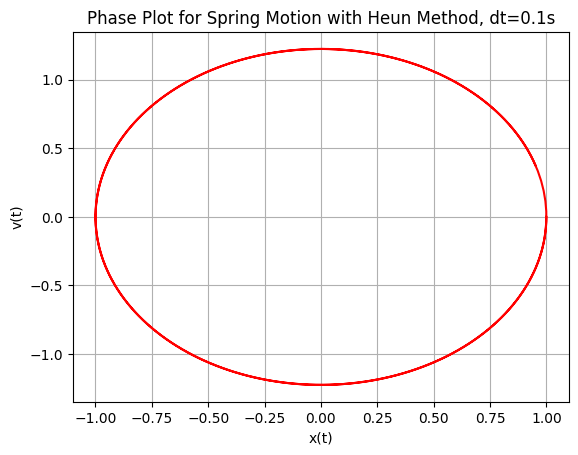

In [34]:
plt.plot(xlist, vlist, 'r-')
plt.grid()
plt.xlabel("x(t)")
plt.ylabel("v(t)")
plt.title(f"Phase Plot for Spring Motion with Heun Method, dt={dt:0.1f}s")

Voila! The error has improved dramatically with the same time-step size. If you dig into this more carefully you'll learn that the error behavior of Heun goes like the square of the stepsize, while Euler is linear in the step size (e.g., dropping the step size by a factor of 10 reduces the Euler error by a factor of 10, but it reduces the Heun error by a factor of 100!).

# Runge Kutta

Mostly for the sake of completeness we'll consider one last numerical method called "Runge Kutta" or "the RK Method". This particular version (there are many RK variations!) is a fourth order method (RK4) that is commonly encountered in libraries (e.g., [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.RK45.html), or [gsl](https://www.gnu.org/software/gsl/doc/html/ode-initval.html#c.gsl_odeiv2_step_type)). 

By using numpy arrays it's easy for us to implement the RK4 method like so:

In [22]:
def RK4Step(s, f, t, dt):
    f1 = f(s,t)
    f2 = f(s+f1*dt/2, t+dt/2)
    f3 = f(s+f2*dt/2, t+dt/2)
    f4 = f(s+f3*dt, t+dt)
    return s + (f1 + 2*f2 + 2*f3 + f4)*dt/6 

You'll notice that it's *very* similar, in spirit, to the Heun Method, except that it's a much more elaborate averaging process. Instead of taking the average of two samples of $f$, this method takes *four* samples. It also weighs the middle two samples (f2 and f3) more heavily than the "outside" samples (f1 and f4). But in principle, it's the same basic idea. Let's try it on our simple example:

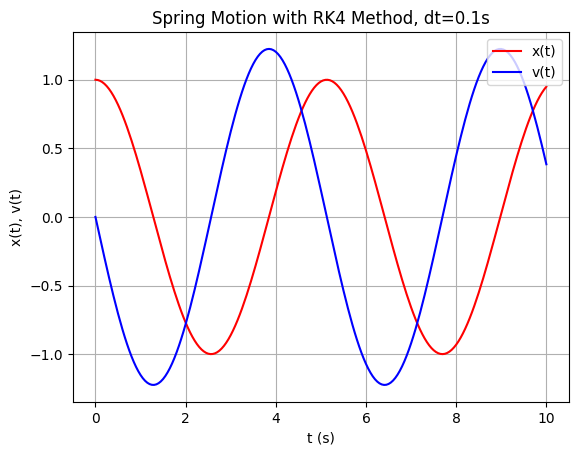

In [23]:
s = np.array([1,0]) # initial state, displacement of 1 unit, no velocity
t = 0
dt = 0.05

tlist = [t]
xlist = [s[0]]
vlist = [s[1]]

while t<10:
    s = RK4Step(s, f_spring, t, dt)
    t = t + dt
    tlist.append(t)
    xlist.append(s[0])
    vlist.append(s[1])

plt.plot(tlist, xlist, 'r-', label="x(t)")
plt.plot(tlist, vlist, 'b-', label="v(t)")
plt.grid()
plt.xlabel("t (s)")
plt.ylabel("x(t), v(t)")
plt.title(f"Spring Motion with RK4 Method, dt={dt:0.1f}s")
plt.legend(loc="upper right")

How do we know it's better when it *appears* to produce the same result as the Heun method? Let's try to dial back the time-step size to see if the method continues to give reasonable results.

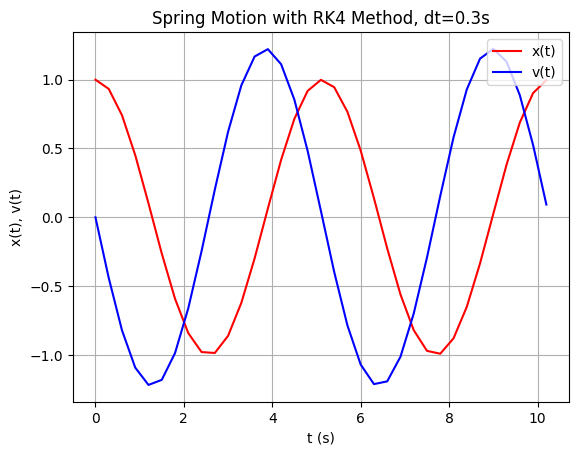

In [24]:
s = np.array([1,0]) # initial state, displacement of 1 unit, no velocity
t = 0
dt = 0.3

tlist = [t]
xlist = [s[0]]
vlist = [s[1]]

while t<10:
    s = RK4Step(s, f_spring, t, dt)
    t = t + dt
    tlist.append(t)
    xlist.append(s[0])
    vlist.append(s[1])

plt.plot(tlist, xlist, 'r-', label="x(t)")
plt.plot(tlist, vlist, 'b-', label="v(t)")
plt.grid()
plt.xlabel("t (s)")
plt.ylabel("x(t), v(t)")
plt.title(f"Spring Motion with RK4 Method, dt={dt:0.1f}s")
plt.legend(loc="upper right")

Wow! Even with a timestep size of 0.3s the RK4 method doesn't increase amplitude as the Euler Method did. Let's try the Heun Method at that timestep for comparison:

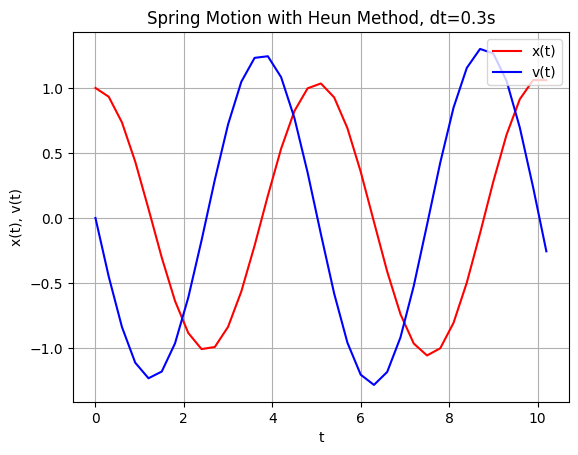

In [25]:
s = np.array([1,0]) # initial state, displacement of 1 unit, no velocity
t = 0
dt = 0.3

tlist = [t]
xlist = [s[0]]
vlist = [s[1]]

while t<10:
    s = HeunStep(s, f_spring, t, dt)
    t = t + dt
    tlist.append(t)
    xlist.append(s[0])
    vlist.append(s[1])

plt.plot(tlist, xlist, 'r-', label="x(t)")
plt.plot(tlist, vlist, 'b-', label="v(t)")
plt.grid()
plt.xlabel("t")
plt.ylabel("x(t), v(t)")
plt.title(f"Spring Motion with Heun Method, dt={dt:0.1f}s")
plt.legend(loc="upper right")

So, it's not dramatic, but you can see that it's not as accurate as the RK4 method. How about Euler?

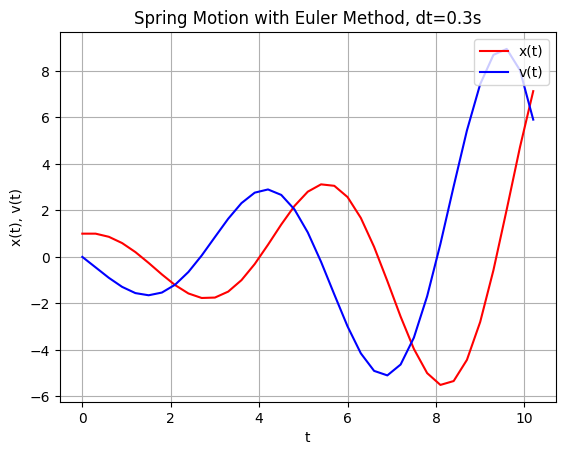

In [26]:
s = np.array([1,0]) # initial state, displacement of 1 unit, no velocity
t = 0
dt = 0.3

tlist = [t]
xlist = [s[0]]
vlist = [s[1]]

while t<10:
    s = EulerStep(s, f_spring, t, dt)
    t = t + dt
    tlist.append(t)
    xlist.append(s[0])
    vlist.append(s[1])

plt.plot(tlist, xlist, 'r-', label="x(t)")
plt.plot(tlist, vlist, 'b-', label="v(t)")
plt.grid()
plt.xlabel("t")
plt.ylabel("x(t), v(t)")
plt.title(f"Spring Motion with Euler Method, dt={dt:0.1f}s")
plt.legend(loc="upper right")

Wow! Euler is hopeless at that timestep size. 

So what's the point of all this? There are a few major points:

1. If you formulate a coupled system of equations using numpy arrays as the "state" it's easy to plug in different numerical approaches to solving them.
2. The Euler Method is super simple, and easy to understand, but it's not terribly stable or accurate.
3. It's easy to *improve* the Euler Method by averaging the $f$ function at different points in time to get much more accurate results. The Heun Method, and RK4 are examples of averaging methods that implement this idea.

That's as deep as we're going to go in this course into numerical solutions. You could build a whole course on this topic alone! If you're interested, please take our "Scientific Computing" course where we spend about five weeks of the semester taking a deep dive in to these ideas. We also explore a large number of other techniques of analysis using a primarily computational approach.

<a name="note1"></a> [^](#ref1) 1. Much of this was taken from my Scientific Computing lesson on the Euler Method: [Euler Method](https://github.com/sspickle/sci-comp-notebooks/blob/master/P01-Euler.ipynb)


# Your Turn!

Now it's your turn to experiment with numerical methods. We'll pick some systems  

## Population modeling 

Suppose you're growing bacteria, or maybe rabbits. As the number of organisms grows, the rate of growth increases since the rate at which the population grows, at least for low levels of population, is proportional to the current population (or perhaps the population density, number per unit area, for example).

$$ \frac{dP}{dt} = P/\tau $$

where $\tau$ is the "time constant" of the growth rate. As you can probably guess based on the problems you've solved so far, this simple model leads to unlimited exponential growth, which is unrealistic. One way to "fix" this problem is to add another factor:

$$ \frac{dP}{dt} = (P/\tau)(1-P/M) $$

Which essentially imposes a limted "carrying capacity" ($M$) which is the maximum steady state population that can be supported by the environment.

### Solving the population model numerically.

Since it's a first order system, we only need one initial condition to find a particular solution. Let's say the initial population is equal to 1 in some set of units (e.g., 1 bacterium per square mm or something). We can use a $\tau$ of one hour. Finally let's assume a carrying capacity of 1000 bacteria per square mm. Since the population density is just a simple number we can make our "state" **s** just equal to the Population density $P$. Finally, let's plot both models (without a carrying capacity, and with a carrying capacity). We'll need one state variable for each, so **scap** for the model with carrying capacity, and just plain old **s** for the model without carrying capacity.

Some of the code is already written, but you should understant it. You have to write the code that computes the time derivatite of the population density for each case: 1. without a carrying capacity, and 2. with a carrying capacity.

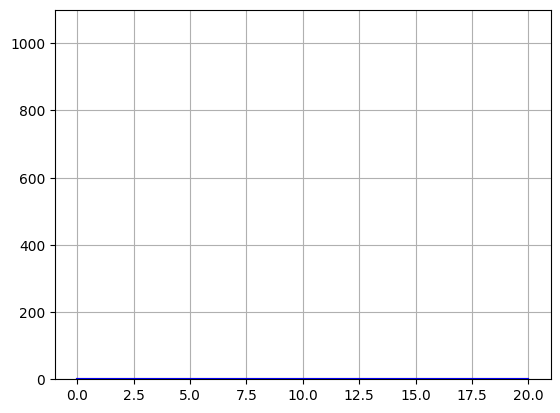

In [27]:
P0 = 1 # initial population in units of bacteria per square mm
scap = P0 # let's make the state variable equal to the population
s = P0 # let's make the state variable equal to the population
t = 0 # initial time, in hours
tau = 1 # doubling time, in hours
M = 1000 # carrying capacity, in units of bacteria per square mm

def f_no_cap(s, t):
    P = s
    dPdt = 0 # what goes here? Fill in the missing expresssion
    return dPdt

def f_cap(s, t):
    P = s
    dPdt = 0 # what goes here? Fill in the missing expresssion
    return dPdt

tlist = [t]
PCaplist = [scap]
Plist = [s]
dt = 0.5

while t < 20:
    scap = RK4Step(scap, f_cap, t, dt)
    s = RK4Step(s, f_no_cap, t, dt)
    t = t + dt
    tlist.append(t)
    Plist.append(s)
    PCaplist.append(scap)

plt.plot(tlist, Plist, 'r-', label="P(t)")
plt.plot(tlist, PCaplist, 'b-', label="Pcap(t)")
plt.ylim(0, M*1.1) # we need this so the autoscaling doesn't make the M value impossible to see. What happens if you comment this line out?
plt.grid()




## Multiple Populations

An interesting case to consider is one where the populations of two species of animal interact with one another. Maybe one is a predator, and the other is prey for that predator. Left along the prey species might experience exponential growth, but because of the predators, the growth is limited. On the other hand, without any prey the predator population would decline since they would be starving. 

Suppose we have foxes and chickens. Let $f$ be the population density of foxes, and $c$ be the density of chickens. Here's a plausible model:

$$\frac{df}{dt} = -f/2 + 0.05 f c$$

So the fox population would fall with a time constant of about two months without any chickens. If there are enough chickens, then the fox population could grow.

$$ \frac{dc}{dt} = +c/4 - 0.05 f*c$$
 
Here the chicking popluation would grow with a time constant of about four months, but if there are too many foxes it will begin to drop.

One interesting question is "What are the points of stable population?" In other words, for what values of $f$ and $c$ do the rates of change go to zero? It's clear that $f=0$ and $c=0$ are stable. Everything just stays zero! Can you find other values of $f$ and $c$ where the populations don't change? How would you do this?

Answer in the empty markdown cell below.

In [28]:
c0 = 9
f0 = 4

def f(s, t):
    c = s[0]
    f = s[1]
    dfdt = # what goes here? Fill in the missing expresssion
    dcdt = # what goes here? Fill in the missing expresssion
    return np.array([dcdt, dfdt])




SyntaxError: invalid syntax (560887366.py, line 7)